In [1]:
# LearningML-DayFour
#
# Logistic regression is used for a different type of problem known as a classification problem. The objective
# is to predict which group an object under observation will belong to. The result is a discrete value, 0 or 1.
#
# This dataset contains information on users in a social network. The data includes a user id, gender type,
# the age, and the estimated salary. A car company has just launched their brand new luxury SUV and they
# are trying to see which of these users of the social network are predicted to buy this brand new SUV.
# The last column indicates if the user bought this SUV (dependent variable). We are going to build a model 
# that is going to predict if a user is going to buy or not the SUV based on the age and the estimated salary
# independent variables. 

# import the initial libraries we'll be using
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# next we'll import the dataset, make sure to set the path to your environment
# we'll also form our data frames for use in creating the logistic model
#
dataset = pd.read_csv('../Materials/datasets/Social_Network_Ads.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# the x data frame contains only the age and salary data
print('x values look like ', x[6:9])

# the y vector contains the binary data on whether the user bought the SUV or not
print('y values look like ', y[6:9])



x values look like  [[    27  84000]
 [    32 150000]
 [    25  33000]]
y values look like  [0 1 0]


In [3]:
# as usual, we split our dataset into a training set for the model, and a test set
# I like to use an 80/20 split
#
# NOTE: In the DayFour code in github, the train_test_split library is retrieved from the sklearn.cross_validation
# package but in sklean 0.20.x, the library is now located in the model_selection package
#
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

print ('The size/shape of our training set is ', x_train.shape, y_train.shape)
print ('The size/shape of our test set is ',x_test.shape, y_test.shape)

print (x_test[:10])

The size/shape of our training set is  (320, 2) (320,)
The size/shape of our test set is  (80, 2) (80,)
[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]]


In [4]:
# Feature scaling
# feature scaling is essentially data normalization applied to the dataset to bring all of the data within
# a particular range. Normalized data can help speed the calculations in the modeling effort but this activity
# should be used sparingly in data pre-processing, and only after an initial analysis of the data is performed
# because feature scaling can hide outlier behaviors, and cause other undesireable data transformations

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_norm = sc.fit_transform(x_train)
x_test_norm = sc.transform(x_test)

print('Here is the scaled training data ', x_train_norm[:10])
print('Here is the scaled test data ', x_train_norm[:10])

Here is the scaled training data  [[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]
 [ 0.36757813  0.29180308]
 [ 0.17315664  0.14694273]
 [ 2.02016082  1.74040666]
 [ 0.75642112 -0.83810771]
 [ 0.27036739 -0.28763835]]
Here is the scaled test data  [[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]
 [ 0.36757813  0.29180308]
 [ 0.17315664  0.14694273]
 [ 2.02016082  1.74040666]
 [ 0.75642112 -0.83810771]
 [ 0.27036739 -0.28763835]]


/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
# now we fit a logistic model to our training data

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver="liblinear")
classifier.fit(x_train_norm, y_train)

print ("The intercept a0 = %.4f" % classifier.intercept_)
print ("The coefficient a1 = ", classifier.coef_)

The intercept a0 = -0.8477
The coefficient a1 =  [[1.99162298 1.07582244]]


In [6]:
# now that we have a fitted model for our dataset, let's do a prediction and analyze it's accuracy
#
y_pred = classifier.predict(x_test_norm)

print ("The forcasted data = ", y_pred)

# now let's look at how good the prediction is from our model
# the accuracy is measured on a scale of 0-1.
print ("The mean accuracy determination for the prediction = %.4f" % classifier.score(x_test_norm, y_test))

The forcasted data =  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]
The mean accuracy determination for the prediction = 0.9125


[[56  2]
 [ 5 17]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

   micro avg       0.91      0.91      0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



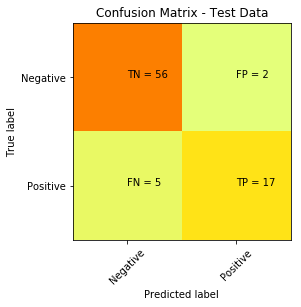

In [8]:
# a common method for evaluating the accruacy of classification model, such as the one we just built, is to 
# use a confusion matrix (no I don't know why they call it that without going to look it up). What a confusion
# matrix provides is a succinct summary of the following categories for our classification model: 
# True Positives, True Negatives, False Positives, and False Negatives.
#
# here's a link to a great explanaton: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

# build a confusion matrix comparing the test data (actual data) with the predicted data
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))

# let's plot the confusion matrix
# Thanks to the following site for excellent plot code for confusion matrices: 
# http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


In [ ]:
# as an extra credit exercise, let's fit a logistic model to the raw data, that is, do not apply the feature scaling
# and we'll see how the prediction accuracy looks for the non-scaled data

classifier_noscale = LogisticRegression(solver="liblinear")
classifier_noscale.fit(x_train, y_train)

print ("The intercept a0 = %.4f" % classifier_noscale.intercept_)
print ("The coefficient a1 = ", classifier_noscale.coef_)

y_pred_noscale = classifier_noscale.predict(x_test)

print ("The forcasted data = ", y_pred_noscale)

# now let's look at how good the prediction is from our model
# the accuracy is measured on a scale of 0-1.
print ("The mean accuracy determination for the prediction = %.4f" % classifier_noscale.score(x_test, y_test))

In [ ]:
# here is the confusion matrix for the non-scaled Logistic Regression classifier model
cm_noscale = confusion_matrix(y_test, y_pred_noscale)

print(cm_noscale)

# let's plot the confusion matrix
plt.clf()
plt.imshow(cm_noscale, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_noscale[i][j]))
plt.show()

print('The observation that is evident in the confusion matrix plot is the number of False Positives is much higher')
print('This would have a huge determental effect on the effectiveness of our model')